# <b><span style='color:#F1A424'>AutoML - Binary Classification </span> </b>

## <b> Problem overview:</b>
    

**Dataset used - Bank Marketing Dataset**

**Features**:

- `age`: Age of customer.
- `job`: Job of customer.
- `marital`: marital status .
- `education`: education background.
- `default_value`: whether customer is default or not.
- `balance`: current balance.
- `housing`: housing status .
- `loan`: Whether customer is having loan or not .
- `contact`: contact type .
- `day_of_month`: day of month for contacting .
- `month_of_year`: month of year for contacting .
- `duration`: duration .
- `campaign`: campaign.
- `pdays`: pdays .
- `previous`: previous customer or not.
- `poutcome`: previous outcome.

**Target Variable**:

- `deposit`: Whether customer will opt for Term Deposit Suscriptions or not.

        
**Objective**:

The primary objective is typically to build a model that can accurately predict term deposit suscriptions from customer.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.


In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [5]:
# Loading dataset from example data collection
load_example_data('teradataml','bank_marketing')

In [6]:
# Fetching in teradata dataframe
bank_df = DataFrame("bank_marketing")

In [7]:
# first 5 rows
bank_df.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit
18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes
18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes
18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes
18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes
19,student,single,unknown,no,60,no,no,cellular,14,aug,253,1,-1,0,unknown,no
19,student,single,primary,no,134,no,no,cellular,27,mar,271,2,-1,0,unknown,yes
18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes
18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes
18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes
18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no


In [8]:
# bank_df dataset
bank_df.shape

(11162, 17)

In [9]:
# Performing sampling to get 80% for trainning and 20% for testing
bank_df_sample = bank_df.sample(frac = [0.8, 0.2])

In [10]:
bank_df_sample.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit,sampleid
18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no,1
18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes,1
18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes,2
18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes,1
19,student,single,unknown,no,108,no,no,cellular,9,mar,273,2,182,1,success,yes,1
19,student,single,unknown,no,779,no,no,cellular,1,apr,184,4,-1,0,unknown,yes,2
18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes,1
18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes,1
18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes,1
18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes,1


In [11]:
# Fetching train and test data
bank_df_train= bank_df_sample[bank_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
bank_df_test = bank_df_sample[bank_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [12]:
# train data shape
bank_df_train.shape

(8930, 17)

In [13]:
# test data shape
bank_df_test.shape

(2232, 17)

In [14]:
#train dataset
bank_df_train.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit
18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no
18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes
18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes
18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes
19,student,single,secondary,no,372,no,no,telephone,8,jul,444,3,-1,0,unknown,yes
19,student,single,primary,no,103,no,no,cellular,10,jul,104,2,-1,0,unknown,yes
19,student,single,primary,no,608,no,no,cellular,12,may,236,1,180,2,success,yes
18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes
18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes
18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes


In [15]:
# test dataset
bank_df_test.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit
20,student,single,secondary,no,1819,no,no,cellular,9,apr,245,3,-1,0,unknown,yes
21,management,single,tertiary,no,243,no,yes,cellular,17,jun,181,2,-1,0,unknown,no
21,blue-collar,married,primary,no,-172,yes,yes,cellular,15,may,409,1,361,3,failure,yes
21,student,single,secondary,no,357,no,no,cellular,2,sep,115,3,-1,0,unknown,no
22,student,single,secondary,no,23,no,no,cellular,27,oct,137,1,-1,0,unknown,yes
22,student,single,unknown,no,549,no,no,cellular,2,sep,154,1,-1,0,unknown,no
22,student,single,secondary,no,107,no,no,cellular,14,apr,125,1,-1,0,unknown,yes
20,student,single,primary,no,0,no,no,cellular,1,feb,143,5,91,8,failure,no
19,student,single,unknown,no,779,no,no,cellular,1,apr,184,4,-1,0,unknown,yes
18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [16]:
# Creating AutoML instance
# Excluding svm from model training.
# Keeping early stopping metrics threshold to 0.6 for 'MICRO-F1', early stopping timer threshold to 300 sec
# and verbose level 2 for detailed loggging

aml = AutoClassifier(exclude=['svm'],
                     stopping_metric='MICRO-F1', 
                     stopping_tolerance=0.60,
                     max_runtime_secs=300,
                     verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 8930
Total Columns in the data: 17

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
default_value,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
age,BIGINT,8930,0,None,0,8930,0,0.0,100.0
job,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
previous,BIGINT,8930,0,None,6654,2276,0,0.0,100.0
education,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
deposit,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
balance,BIGINT,8930,0,None,609,7772,549,0.0,100.0
day_of_month,BIGINT,8930,0,None,0,8930,0,0.0,100.0
campaign,BIGINT,8930,0,None,0,8930,0,0.0,100.0
housing,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0



Statistics of Data:


func,age,balance,day_of_month,duration,campaign,pdays,previous
std,11.885,3131.723,8.398,342.111,2.683,107.706,2.364
25%,32,128,8,139,1,-1,0
50%,39,561,15,256,2,-1,0
75%,49,1708.75,22,494,3,35,1
max,95,81204,31,3284,43,854,58
min,18,-6847,1,2,1,-1,0
mean,41.138,1518.583,15.668,370.301,2.5,51.051,0.846
count,8930,8930,8930,8930,8930,8930,8930



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
job                       12        
marital                   3         
education                 4         
default_value             2         
housing                   2         
loan                      2         
contact                   3         
month_of_year             12        
poutcome                  4         
deposit                   2         

No Futile columns found.

Target Column Distribution:


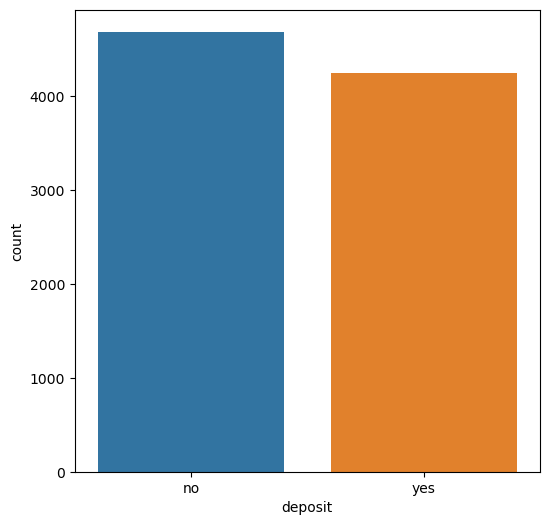

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0   campaign           5.218365
1   duration           5.587906
2        age           1.433371
3   previous          11.343785
4      pdays          22.844345
5    balance           9.350504


Analysis complete. No action taken.                                                     


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711983338361167"'8
All categorical columns seem to be significant.                                         


Dataset does not contain any feature related to dates.                                   


No Missing Values Detected.                                                              


No imputation is Required.                                                               


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711982696164500"'18


['month_of_year', 'housing', 'contact', 'job', 'education', 'default_value', 'marital', 'poutcome', 'loan']


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,balance,pdays,housing_0,housing_1,contact_0,contact_1,contact_2,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,education_0,education_1,education_2,education_3,day_of_month,default_value_0,default_value_1,previous,age,id,marital_0,marital_1,marital_2,poutcome_0,poutcome_1,poutcome_2,poutcome_3,loan_0,loan_1,duration,campaign,deposit
1,0,0,0,0,0,0,0,0,0,0,0,1389,-1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,8,1,0,0,78,39,1,0,0,0,0,0,1,1,0,335,1,1
1,0,0,0,0,0,0,0,0,0,0,0,394,-1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,5,1,0,0,19,43,0,0,1,0,0,0,1,1,0,327,3,1
1,0,0,0,0,0,0,0,0,0,0,0,2628,-1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,14,1,0,0,78,47,1,0,0,0,0,0,1,1,0,129,2,0
1,0,0,0,0,0,0,0,0,0,0,0,1411,-1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,15,1,0,0,76,56,1,0,0,0,0,0,1,1,0,170,3,1
1,0,0,0,0,0,0,0,0,0,0,0,240,-1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,20,1,0,0,78,63,0,1,0,0,0,0,1,1,0,325,1,1
1,0,0,0,0,0,0,0,0,0,0,0,8556,-1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,21,1,0,0,78,71,0,1,0,0,0,0,1,1,0,137,2,1
0,0,0,0,1,0,0,0,0,0,0,0,8919,-1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,28,1,0,0,76,8,0,1,0,0,0,0,1,1,0,231,1,0
0,0,0,0,0,1,0,0,0,0,0,0,855,-1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,1,0,0,34,9,0,0,1,0,0,0,1,1,0,578,1,1
0,0,0,0,0,1,0,0,0,0,0,0,103,-1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,10,1,0,0,19,11,0,0,1,0,0,0,1,1,0,104,2,1
0,0,0,0,1,0,0,0,0,0,0,0,997,91,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,28,1,0,3,80,12,0,1,0,0,0,1,0,1,0,151,1,1


month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,balance,pdays,housing_0,housing_1,contact_0,contact_1,contact_2,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,education_0,education_1,education_2,education_3,day_of_month,default_value_0,default_value_1,previous,age,id,marital_0,marital_1,marital_2,poutcome_0,poutcome_1,poutcome_2,poutcome_3,loan_0,loan_1,duration,campaign,deposit
1,0,0,0,0,0,0,0,0,0,0,0,63,-1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,17,1,0,0,34,249,0,0,1,0,0,0,1,1,0,678,1,1
1,0,0,0,0,0,0,0,0,0,0,0,754,-1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,6,1,0,0,40,266,0,1,0,0,0,0,1,0,1,635,1,1
1,0,0,0,0,0,0,0,0,0,0,0,326,-1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,17,1,0,0,38,316,0,1,0,0,0,0,1,1,0,69,2,0
1,0,0,0,0,0,0,0,0,0,0,0,196,-1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,30,1,0,0,38,412,0,1,0,0,0,0,1,1,0,574,1,1
1,0,0,0,0,0,0,0,0,0,0,0,3676,-1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,7,1,0,0,26,536,0,0,1,0,0,0,1,1,0,148,1,1
1,0,0,0,0,0,0,0,0,0,0,0,2069,-1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,22,1,0,0,32,599,0,0,1,0,0,0,1,1,0,545,1,1
0,0,0,0,0,0,0,0,0,0,0,1,3840,409,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,24,1,0,2,40,10,0,0,1,0,0,1,0,1,0,232,2,1
0,0,0,1,0,0,0,0,0,0,0,0,2223,-1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,4,1,0,0,76,24,0,1,0,0,0,0,1,1,0,429,1,1
0,0,0,0,0,0,0,0,0,0,1,0,4112,-1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,23,1,0,0,76,32,0,1,0,0,0,0,1,1,0,282,2,1
0,0,0,0,0,0,0,0,1,0,0,0,1744,-1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,21,1,0,0,40,34,0,0,1,0,0,0,1,1,0,465,11,0


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0   duration           5.587906
1   campaign           5.218365
2    balance           9.350504
3   previous          11.343785
4        age           1.433371
5         id           0.761478
6      pdays          22.844345


['age', 'duration', 'campaign', 'id']
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711983221816037"'18


['pdays', 'previous', 'balance']
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711982960965784"'18


['balance', 'job_1', 'month_of_year_5', 'pdays', 'month_of_year_11', 'education_3', 'job_4', 'job_6', 'job_7', 'loan_1', 'day_of_month', 'default_value_0', 'poutcome_0', 'housing_0', 'month_of_year_8', 'month_of_year_6', 'month_of_year_10', 'job_5', 'contact_2', 'month_of_year_7', 'job_11', 'month_of_year_2', 'previous', 'education_0', 'education_1', 'job_2', 'month_of_year_3', 'contact_0', 'marital_1', 'job_10', 'duration', 'default_value_1', 'marital_2', 'poutcome_3', 'job_0', 'housing_1', 'month_of_year_9', 'job_9', 'loan_0', 'poutcome_1', 'job_3', 'education_2', 'poutcome_2', 'month_of_year_1', 'job_8', 'marital_0', 'age', 'month_of_year_4', 'campaign', 'contact_1']


['balance', 'pdays', 'day_of_month', 'previous', 'duration', 'age', 'campaign']


job_1,month_of_year_5,month_of_year_11,education_3,job_6,job_7,loan_1,poutcome_0,default_value_0,housing_0,month_of_year_8,month_of_year_6,month_of_year_10,job_5,contact_2,month_of_year_7,job_11,month_of_year_2,education_0,education_1,job_2,month_of_year_3,contact_0,marital_1,job_10,default_value_1,marital_2,poutcome_3,job_0,housing_1,month_of_year_9,job_9,loan_0,month_of_year_4,poutcome_1,job_3,education_2,poutcome_2,deposit,month_of_year_1,job_8,marital_0,id,job_4,contact_1,balance,pdays,day_of_month,previous,duration,age,campaign
0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,197,1,0,0.9588216145833334,0.8697674418604651,0.13333333333333333,0.0,0.1548076923076923,0.5535714285714286,0.0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,208,0,0,0.7679036458333334,0.0,0.5,0.0,0.23076923076923078,0.14285714285714285,0.0
0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,27,0,0,0.34326171875,0.0,0.43333333333333335,0.0,0.24134615384615385,0.017857142857142856,0.0
0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,226,1,0,1.0,0.0,0.6333333333333333,0.0,0.26826923076923076,0.39285714285714285,0.0
0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,254,0,0,0.4715169270833333,0.8744186046511628,0.8666666666666667,0.5,0.5798076923076924,0.7678571428571429,0.0
0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,41,0,0,0.328125,0.0,0.3,0.0,0.9221153846153847,0.2857142857142857,0.0
1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,7223,0,0,0.3253580729166667,0.0,0.4666666666666667,0.0,0.09423076923076923,0.375,0.0
1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7226,0,0,0.2584635416666667,0.0,0.7333333333333333,0.0,0.32403846153846155,0.30357142857142855,0.0
1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,7227,0,0,0.9910481770833334,0.0,0.3333333333333333,0.0,0.04903846153846154,0.5178571428571429,0.8
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,7230,0,0,0.4318033854166667,0.0,0.5666666666666667,0.0,0.3769230769230769,0.23214285714285715,0.2


job_1,month_of_year_5,month_of_year_11,education_3,job_6,job_7,loan_1,poutcome_0,default_value_0,housing_0,month_of_year_8,month_of_year_6,month_of_year_10,job_5,contact_2,month_of_year_7,job_11,month_of_year_2,education_0,education_1,job_2,month_of_year_3,contact_0,marital_1,job_10,default_value_1,marital_2,poutcome_3,job_0,housing_1,month_of_year_9,job_9,loan_0,month_of_year_4,poutcome_1,job_3,education_2,poutcome_2,deposit,month_of_year_1,job_8,marital_0,id,job_4,contact_1,balance,pdays,day_of_month,previous,duration,age,campaign
0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,149,0,0,1.27783203125,0.0,0.9666666666666667,0.0,0.5923076923076923,0.5535714285714286,0.2
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,249,0,0,0.34375,0.0,0.5333333333333333,0.0,0.65,0.2857142857142857,0.0
0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,32,0,1,1.0027669270833333,0.0,0.7333333333333333,0.0,0.2692307692307692,1.0357142857142858,0.2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,263,0,0,0.3248697916666667,1.2697674418604652,0.5,0.5,0.6211538461538462,0.25,0.0
0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,266,1,0,0.4562174479166667,0.0,0.16666666666666666,0.0,0.6086538461538461,0.39285714285714285,0.0
0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,35,0,0,0.4324544270833333,0.8418604651162791,0.36666666666666664,1.0,0.225,0.017857142857142856,0.0
0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,34,0,0,0.6173502604166666,0.0,0.6666666666666666,0.0,0.44519230769230766,0.39285714285714285,2.0
0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,24,0,1,0.6953125,0.0,0.1,0.0,0.41057692307692306,1.0357142857142858,0.0
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,10,1,0,0.95849609375,1.9069767441860466,0.7666666666666667,1.0,0.22115384615384615,0.39285714285714285,0.2
0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,38,0,0,0.33447265625,0.0,0.43333333333333335,0.0,0.12596153846153846,0.7678571428571429,0.2


['month_of_year_1', 'month_of_year_3', 'month_of_year_4', 'month_of_year_5', 'month_of_year_6', 'month_of_year_7', 'month_of_year_8', 'month_of_year_9', 'month_of_year_10', 'month_of_year_11', 'balance', 'pdays', 'housing_0', 'housing_1', 'contact_0', 'contact_1', 'contact_2', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'education_0', 'education_1', 'education_2', 'education_3', 'day_of_month', 'default_value_1', 'previous', 'age', 'marital_0', 'marital_1', 'marital_2', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3', 'loan_0', 'loan_1', 'duration', 'campaign']


['r_balance', 'r_pdays', 'r_day_of_month', 'r_previous', 'r_age', 'r_duration', 'r_campaign']


r_marital_2,r_month_of_year_5,r_job_4,r_job_9,r_month_of_year_8,r_poutcome_3,r_job_3,r_contact_2,r_education_2,r_job_10,r_month_of_year_9,r_job_5,r_month_of_year_3,r_education_1,r_marital_1,r_job_0,r_job_2,r_poutcome_0,r_job_1,r_month_of_year_7,r_education_0,r_job_8,r_loan_0,r_marital_0,r_housing_0,r_month_of_year_11,r_poutcome_2,r_loan_1,r_contact_0,r_job_7,r_default_value_1,r_month_of_year_10,deposit,r_month_of_year_4,r_month_of_year_1,r_contact_1,r_poutcome_1,id,r_housing_1,r_education_3,r_month_of_year_6,r_job_6,r_balance,r_pdays,r_day_of_month,r_previous,r_age,r_duration,r_campaign
0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,197,0,0,0,0,0.9588216145833334,0.8697674418604651,0.13333333333333333,0.0,0.5535714285714286,0.1548076923076923,0.0
1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,208,1,0,0,0,0.7679036458333334,0.0,0.5,0.0,0.14285714285714285,0.23076923076923078,0.0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,27,0,1,0,0,0.34326171875,0.0,0.43333333333333335,0.0,0.017857142857142856,0.24134615384615385,0.0
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,226,1,1,0,0,1.0,0.0,0.6333333333333333,0.0,0.39285714285714285,0.26826923076923076,0.0
0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,254,0,0,0,0,0.4715169270833333,0.8744186046511628,0.8666666666666667,0.5,0.7678571428571429,0.5798076923076924,0.0
0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,41,1,0,0,0,0.328125,0.0,0.3,0.0,0.2857142857142857,0.9221153846153847,0.0
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,8030,0,0,0,0,0.3653971354166667,0.0,0.2,0.0,0.23214285714285715,0.23653846153846153,0.0
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8034,1,0,0,0,0.2737630208333333,0.0,0.3333333333333333,0.5,0.30357142857142855,0.07211538461538461,0.0
0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8035,0,0,1,0,0.39208984375,0.0,0.6333333333333333,0.0,0.48214285714285715,0.09230769230769231,0.2
1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,8042,1,0,0,0,0.416015625,0.0,0.7,0.0,0.30357142857142855,0.5365384615384615,0.2


r_marital_2,r_month_of_year_5,r_job_4,r_job_9,r_month_of_year_8,r_poutcome_3,r_job_3,r_contact_2,r_education_2,r_job_10,r_month_of_year_9,r_job_5,r_month_of_year_3,r_education_1,r_marital_1,r_job_0,r_job_2,r_poutcome_0,r_job_1,r_month_of_year_7,r_education_0,r_job_8,r_loan_0,r_marital_0,r_housing_0,r_month_of_year_11,r_poutcome_2,r_loan_1,r_contact_0,r_job_7,r_default_value_1,r_month_of_year_10,deposit,r_month_of_year_4,r_month_of_year_1,r_contact_1,r_poutcome_1,id,r_housing_1,r_education_3,r_month_of_year_6,r_job_6,r_balance,r_pdays,r_day_of_month,r_previous,r_age,r_duration,r_campaign
1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,149,0,0,0,0,1.27783203125,0.0,0.9666666666666667,0.0,0.5535714285714286,0.5923076923076923,0.2
1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,249,1,0,0,0,0.34375,0.0,0.5333333333333333,0.0,0.2857142857142857,0.65,0.0
0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,32,0,0,0,0,1.0027669270833333,0.0,0.7333333333333333,0.0,1.0357142857142858,0.2692307692307692,0.2
0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,263,1,0,0,0,0.3248697916666667,1.2697674418604652,0.5,0.5,0.25,0.6211538461538462,0.0
0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,266,0,0,0,0,0.4562174479166667,0.0,0.16666666666666666,0.0,0.39285714285714285,0.6086538461538461,0.0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,35,0,0,0,0,0.4324544270833333,0.8418604651162791,0.36666666666666664,1.0,0.017857142857142856,0.225,0.0
1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,1,0,0,0,0.6173502604166666,0.0,0.6666666666666666,0.0,0.39285714285714285,0.44519230769230766,2.0
0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,24,0,0,0,0,0.6953125,0.0,0.1,0.0,1.0357142857142858,0.41057692307692306,0.0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,10,1,0,0,0,0.95849609375,1.9069767441860466,0.7666666666666667,1.0,0.39285714285714285,0.22115384615384615,0.2
0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,38,1,0,0,1,0.33447265625,0.0,0.43333333333333335,0.0,0.7678571428571429,0.12596153846153846,0.2


['balance', 'pdays', 'day_of_month', 'previous', 'age', 'duration', 'campaign']


job_1,month_of_year_5,month_of_year_11,education_3,job_4,job_6,job_7,loan_1,default_value_0,poutcome_0,housing_0,month_of_year_8,month_of_year_6,month_of_year_10,job_5,contact_2,month_of_year_7,job_11,month_of_year_2,education_0,education_1,job_2,month_of_year_3,contact_0,marital_1,job_10,default_value_1,marital_2,poutcome_3,job_0,housing_1,month_of_year_9,job_9,loan_0,poutcome_1,job_3,education_2,poutcome_2,deposit,month_of_year_0,month_of_year_1,job_8,marital_0,id,month_of_year_4,contact_1,balance,pdays,day_of_month,previous,age,duration,campaign
0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,27,0,0,0.34326171875,0.0,0.43333333333333335,0.0,0.017857142857142856,0.24134615384615385,0.0
0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,41,0,0,0.328125,0.0,0.3,0.0,0.2857142857142857,0.9221153846153847,0.0
0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,46,0,0,0.84033203125,0.0,0.4,0.0,0.7678571428571429,0.3644230769230769,0.0
1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,49,0,0,0.3382161458333333,0.0,0.4666666666666667,0.0,0.2857142857142857,0.2721153846153846,0.8
0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,53,0,0,0.33349609375,0.0,0.9,0.0,0.5535714285714286,0.3942307692307692,0.2
0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,54,0,0,0.4239908854166667,0.0,0.7666666666666667,0.0,0.7678571428571429,0.46057692307692305,0.2
0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,134,0,0,0.4239908854166667,0.8511627906976744,0.9666666666666667,1.0,0.7678571428571429,0.30096153846153845,0.0
0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,197,0,0,0.9588216145833334,0.8697674418604651,0.13333333333333333,0.0,0.5535714285714286,0.1548076923076923,0.0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,208,0,0,0.7679036458333334,0.0,0.5,0.0,0.14285714285714285,0.23076923076923078,0.0
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,226,0,0,1.0,0.0,0.6333333333333333,0.0,0.39285714285714285,0.26826923076923076,0.0


job_1,month_of_year_5,month_of_year_11,education_3,job_4,job_6,job_7,loan_1,default_value_0,poutcome_0,housing_0,month_of_year_8,month_of_year_6,month_of_year_10,job_5,contact_2,month_of_year_7,job_11,month_of_year_2,education_0,education_1,job_2,month_of_year_3,contact_0,marital_1,job_10,default_value_1,marital_2,poutcome_3,job_0,housing_1,month_of_year_9,job_9,loan_0,poutcome_1,job_3,education_2,poutcome_2,deposit,month_of_year_0,month_of_year_1,job_8,marital_0,id,month_of_year_4,contact_1,balance,pdays,day_of_month,previous,age,duration,campaign
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,249,0,0,0.34375,0.0,0.5333333333333333,0.0,0.2857142857142857,0.65,0.0
0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,266,0,0,0.4562174479166667,0.0,0.16666666666666666,0.0,0.39285714285714285,0.6086538461538461,0.0
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,316,0,0,0.3865559895833333,0.0,0.5333333333333333,0.0,0.35714285714285715,0.06442307692307692,0.2
0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,412,0,0,0.3653971354166667,0.0,0.9666666666666667,0.0,0.35714285714285715,0.55,0.0
0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,536,0,0,0.9318033854166666,0.0,0.2,0.0,0.14285714285714285,0.14038461538461539,0.0
0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,599,0,0,0.6702473958333334,0.0,0.7,0.0,0.25,0.5221153846153846,0.0
0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,10,0,0,0.95849609375,1.9069767441860466,0.7666666666666667,1.0,0.39285714285714285,0.22115384615384615,0.2
0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,24,0,1,0.6953125,0.0,0.1,0.0,1.0357142857142858,0.41057692307692306,0.0
0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,32,0,1,1.0027669270833333,0.0,0.7333333333333333,0.0,1.0357142857142858,0.2692307692307692,0.2
0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,34,0,0,0.6173502604166666,0.0,0.6666666666666666,0.0,0.39285714285714285,0.44519230769230766,2.0


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21', 'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28', 'col_29', 'col_30']


response_column : deposit                                                                                                                             
name : knn
model_type : Classification
k : (3, 5, 6, 8, 10, 12)
id_column : id
voting_weight : 1.0
Total number of models for knn : 6
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : deposit
name : glm
family : BINOMIAL
lambda1 : (0.001, 0.02, 0.1)
alpha : (0.15, 0.85)
learning_rate : OPTIMAL
initial_eta : (0.05, 0.1)
momentum : (0.65, 0.8, 0.95)
iter_num_no_change : (5, 10, 50)
iter_max : (300, 200, 400, 500)
batch_size : (10, 80, 100, 150)
Total number of models for glm : 1728
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

KNN_0                                                                                                                                                                                                   
KNN_4                                                                                     
KNN_8                                                                                     


GLM_0                                                                                                                                                                                                   
GLM_1                                                                                     
GLM_2                                                                                     


DECISIONFOREST_3                                                                                                                                                                                        
DECISIONFOREST_1                                                                          
DECISIONFOREST_2                                                                          


XGBOOST_3                                                                                                                                                                                               
XGBOOST_1                                                                                 
XGBOOST_2                                                                                 


,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,lasso,0.827548,0.827548,0.827548,0.827548,0.827530,0.826552,0.826915,0.827542,0.827548,0.827419
1,2,xgboost,rfe,0.815230,0.815230,0.815230,0.815230,0.814769,0.815016,0.814876,0.815335,0.815230,0.815266
2,3,decision_forest,lasso,0.811870,0.811870,0.811870,0.811870,0.815439,0.808947,0.809983,0.814303,0.811870,0.810895
3,4,xgboost,pca,0.792273,0.792273,0.792273,0.792273,0.792512,0.793169,0.792193,0.793798,0.792273,0.792390
4,5,decision_forest,rfe,0.788354,0.788354,0.788354,0.788354,0.792147,0.785106,0.785982,0.791022,0.788354,0.787067
5,6,decision_forest,pca,0.769317,0.769317,0.769317,0.769317,0.769295,0.767808,0.768235,0.769307,0.769317,0.768998
6,7,knn,rfe,0.737962,0.737962,0.737962,0.737962,0.739693,0.734921,0.735392,0.739133,0.737962,0.736648
7,8,knn,pca,0.732363,0.732363,0.732363,0.732363,0.733385,0.729633,0.730087,0.733022,0.732363,0.731280
8,9,knn,lasso,0.732363,0.732363,0.732363,0.732363,0.733665,0.729471,0.729916,0.733224,0.732363,0.731154
9,10,glm,pca,0.719485,0.719485,0.719485,0.719485,0.725219,0.714644,0.714282,0.723974,0.719485,0.716139


In [17]:
# Fitting train data
aml.fit(bank_df_train, bank_df_train.deposit)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [18]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,lasso,0.827548,0.827548,0.827548,0.827548,0.827530,0.826552,0.826915,0.827542,0.827548,0.827419
1,2,xgboost,rfe,0.815230,0.815230,0.815230,0.815230,0.814769,0.815016,0.814876,0.815335,0.815230,0.815266
2,3,decision_forest,lasso,0.811870,0.811870,0.811870,0.811870,0.815439,0.808947,0.809983,0.814303,0.811870,0.810895
3,4,xgboost,pca,0.792273,0.792273,0.792273,0.792273,0.792512,0.793169,0.792193,0.793798,0.792273,0.792390
4,5,decision_forest,rfe,0.788354,0.788354,0.788354,0.788354,0.792147,0.785106,0.785982,0.791022,0.788354,0.787067
5,6,decision_forest,pca,0.769317,0.769317,0.769317,0.769317,0.769295,0.767808,0.768235,0.769307,0.769317,0.768998
6,7,knn,rfe,0.737962,0.737962,0.737962,0.737962,0.739693,0.734921,0.735392,0.739133,0.737962,0.736648
7,8,knn,pca,0.732363,0.732363,0.732363,0.732363,0.733385,0.729633,0.730087,0.733022,0.732363,0.731280
8,9,knn,lasso,0.732363,0.732363,0.732363,0.732363,0.733665,0.729471,0.729916,0.733224,0.732363,0.731154
9,10,glm,pca,0.719485,0.719485,0.719485,0.719485,0.725219,0.714644,0.714282,0.723974,0.719485,0.716139


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [19]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,xgboost,lasso,0.827548,0.827548,0.827548,0.827548,0.82753,0.826552,0.826915,0.827542,0.827548,0.827419


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [20]:
# Generating prediction and metrics on default test data
prediction = aml.predict(rank=2)

xgboost rfe
Target Column Mapping:
yes: 1
no: 0

 Prediction : 
   deposit   id  Prediction  Confidence_Lower  Confidence_upper
0        1  149           1              0.68              0.68
1        1  249           1              0.80              0.80
2        1   32           1              0.56              0.56
3        1  263           1              0.72              0.72
4        1  266           1              0.92              0.92
5        1   35           1              0.88              0.88
6        0   34           0              0.52              0.52
7        1   24           1              0.72              0.72
8        1   10           1              0.72              0.72
9        1   38           0              0.76              0.76

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1      767  

AUC,GINI
0.7418382352941176,0.48367647058823526


threshold_value,tpr,fpr
0.04081632653061224,0.8105882352941176,0.18055555555555555
0.08163265306122448,0.8105882352941176,0.18055555555555555
0.1020408163265306,0.8105882352941176,0.18055555555555555
0.12244897959183673,0.8105882352941176,0.18055555555555555
0.16326530612244897,0.8105882352941176,0.18055555555555555
0.18367346938775508,0.8105882352941176,0.18055555555555555
0.14285714285714285,0.8105882352941176,0.18055555555555555
0.061224489795918366,0.8105882352941176,0.18055555555555555
0.02040816326530612,0.8105882352941176,0.18055555555555555
0.0,1.0,1.0



 Confusion Matrix : 


array([[767, 169],
       [161, 689]], dtype=int64)

In [21]:
# Printing prediction
prediction.head()

deposit,id,Prediction,Confidence_Lower,Confidence_upper
0,123,0,0.88,0.88
0,1193,0,0.96,0.96
0,1260,1,0.6,0.6
0,139,0,0.8,0.8
0,163,0,0.8,0.8
0,1658,0,0.96,0.96
0,1346,0,0.64,0.64
0,125,0,0.96,0.96
0,1018,0,0.76,0.76
0,641,0,0.6,0.6


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [22]:
# Generating prediction and metrics on test data
prediction = aml.predict(bank_df_test)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711992045233975"'

Updated dataset after performing target column transformation :


month_of_year,balance,pdays,housing,contact,job,education,day_of_month,default_value,previous,age,id,marital,poutcome,loan,duration,campaign,deposit
may,100,-1,yes,unknown,blue-collar,secondary,29,no,0,40,314,married,unknown,no,218,2,0
dec,2986,231,no,cellular,management,unknown,17,no,1,57,610,divorced,failure,no,222,2,1
dec,294,184,yes,cellular,technician,secondary,9,no,3,34,593,married,success,no,265,1,1
nov,3430,-1,yes,cellular,unemployed,secondary,20,no,0,40,434,married,unknown,no,1855,3,0
jan,1694,251,yes,cellular,services,secondary,29,no,6,37,1122,married,failure,yes,404,2,0
jan,78,-1,no,telephone,blue-collar,secondary,28,no,0,26,248,single,unknown,no,43,1,0
mar,304,-1,no,cellular,admin.,secondary,18,no,0,35,2074,married,unknown,no,237,1,1
mar,2993,-1,no,cellular,services,secondary,11,no,0,52,2450,married,unknown,no,96,6,0
nov,372,-1,no,cellular,management,tertiary,21,no,0,57,626,married,unknown,no,553,3,1
may,54,362,yes,cellular,blue-collar,primary,13,no,3,40,266,divorced,other,no,10,5,0


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711987073304144"'

Updated dataset after performing categorical encoding :


month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,balance,pdays,housing_0,housing_1,contact_0,contact_1,contact_2,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,education_0,education_1,education_2,education_3,day_of_month,default_value_0,default_value_1,previous,age,id,marital_0,marital_1,marital_2,poutcome_0,poutcome_1,poutcome_2,poutcome_3,loan_0,loan_1,duration,campaign,deposit
1,0,0,0,0,0,0,0,0,0,0,0,255,80,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,30,1,0,1,26,192,0,0,1,0,0,1,0,1,0,457,1,1
1,0,0,0,0,0,0,0,0,0,0,0,15841,-1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,20,1,0,0,34,721,0,1,0,0,0,0,1,1,0,423,5,0
1,0,0,0,0,0,0,0,0,0,0,0,507,-1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,30,1,0,0,26,184,0,0,1,0,0,0,1,1,0,380,1,1
1,0,0,0,0,0,0,0,0,0,0,0,925,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,13,1,0,0,34,689,0,0,1,0,0,0,1,1,0,709,1,1
1,0,0,0,0,0,0,0,0,0,0,0,72,348,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,20,1,0,3,42,3350,0,1,0,1,0,0,0,1,0,124,2,0
1,0,0,0,0,0,0,0,0,0,0,0,1598,-1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,1,0,0,42,3262,0,1,0,0,0,0,1,0,1,1463,2,1
0,0,0,0,0,0,0,1,0,0,0,0,31,-1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,10,1,0,0,52,2634,0,1,0,0,0,0,1,1,0,135,1,1
0,0,0,0,0,0,0,1,0,0,0,0,0,195,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,15,1,0,1,82,3074,1,0,0,0,1,0,0,1,0,506,2,1
0,0,0,0,0,0,0,1,0,0,0,0,212,-1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,25,1,0,0,34,89,0,0,1,0,0,0,1,1,0,278,8,1
0,0,0,0,0,0,0,1,0,0,0,0,158,181,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,9,1,0,6,34,433,0,1,0,0,0,1,0,1,0,212,3,1


Performing transformation carried out in data preparation phase ...

Updated dataset after performing Lasso feature selection:


id,balance,job_1,month_of_year_5,pdays,month_of_year_11,education_3,job_4,job_6,job_7,loan_1,day_of_month,default_value_0,poutcome_0,housing_0,month_of_year_8,month_of_year_6,month_of_year_10,job_5,contact_2,month_of_year_7,job_11,month_of_year_2,previous,education_0,education_1,job_2,month_of_year_3,contact_0,marital_1,job_10,duration,default_value_1,marital_2,poutcome_3,job_0,housing_1,month_of_year_9,job_9,loan_0,poutcome_1,job_3,education_2,poutcome_2,month_of_year_1,job_8,marital_0,age,month_of_year_4,campaign,contact_1,deposit
192,255,0,0,80,0,0,0,0,0,0,30,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,457,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,26,0,1,0,1
721,15841,1,0,-1,0,0,0,0,0,0,20,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,423,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,34,0,5,0,0
184,507,0,0,-1,0,0,0,0,0,0,30,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,380,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,26,0,1,0,1
689,925,0,0,-1,0,0,0,0,0,0,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,709,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,34,0,1,0,1
3350,72,0,0,348,0,0,1,0,0,0,20,1,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,1,0,124,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,42,0,2,0,0
3262,1598,1,0,-1,0,0,0,0,0,1,16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1463,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,42,0,2,0,1
2634,31,0,0,-1,0,0,1,0,0,0,10,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,135,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,52,0,1,0,1
3074,0,0,0,195,0,0,0,0,0,0,15,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,506,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,82,0,2,1,1
89,212,0,0,-1,0,0,1,0,0,0,25,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,278,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,34,0,8,0,1
433,158,0,0,181,0,0,1,0,0,0,9,1,0,1,0,0,0,0,0,1,0,0,6,0,0,0,0,1,1,0,212,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,34,0,3,0,1



Updated dataset after performing scaling on Lasso selected features :


job_1,month_of_year_5,month_of_year_11,education_3,job_6,job_7,loan_1,poutcome_0,default_value_0,housing_0,month_of_year_8,month_of_year_6,month_of_year_10,job_5,contact_2,month_of_year_7,job_11,month_of_year_2,education_0,education_1,job_2,month_of_year_3,contact_0,marital_1,job_10,default_value_1,marital_2,poutcome_3,job_0,housing_1,month_of_year_9,job_9,loan_0,month_of_year_4,poutcome_1,job_3,education_2,poutcome_2,deposit,month_of_year_1,job_8,marital_0,id,job_4,contact_1,balance,pdays,day_of_month,previous,duration,age,campaign
0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,192,0,0,0.375,0.3767441860465116,0.9666666666666667,0.5,0.4375,0.14285714285714285,0.0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,721,0,0,2.9117838541666665,0.0,0.6333333333333333,0.0,0.4048076923076923,0.2857142857142857,0.8
0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,184,0,0,0.416015625,0.0,0.9666666666666667,0.0,0.36346153846153845,0.14285714285714285,0.0
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,689,0,0,0.4840494791666667,0.0,0.4,0.0,0.6798076923076923,0.2857142857142857,0.0
0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,3350,1,0,0.34521484375,1.6232558139534883,0.6333333333333333,1.5,0.11730769230769231,0.42857142857142855,0.2
1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,3262,0,0,0.5935872395833334,0.0,0.5,0.0,1.4048076923076922,0.42857142857142855,0.2
0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,2634,1,0,0.3385416666666667,0.0,0.3,0.0,0.12788461538461537,0.6071428571428571,0.0
0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,3074,0,1,0.33349609375,0.9116279069767442,0.4666666666666667,0.5,0.4846153846153846,1.1428571428571428,0.2
0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,89,1,0,0.3680013020833333,0.0,0.8,0.0,0.2653846153846154,0.2857142857142857,1.4
0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,433,1,0,0.3592122395833333,0.8465116279069768,0.26666666666666666,3.0,0.20192307692307693,0.2857142857142857,0.4



Updated dataset after performing RFE feature selection:


id,month_of_year_1,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,balance,pdays,housing_0,housing_1,contact_0,contact_1,contact_2,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,education_0,education_1,education_2,education_3,day_of_month,default_value_1,previous,age,marital_0,marital_1,marital_2,poutcome_0,poutcome_1,poutcome_2,poutcome_3,loan_0,loan_1,duration,campaign,deposit
192,0,0,0,0,0,0,0,0,0,0,255,80,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,30,0,1,26,0,0,1,0,0,1,0,1,0,457,1,1
721,0,0,0,0,0,0,0,0,0,0,15841,-1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,20,0,0,34,0,1,0,0,0,0,1,1,0,423,5,0
184,0,0,0,0,0,0,0,0,0,0,507,-1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,30,0,0,26,0,0,1,0,0,0,1,1,0,380,1,1
689,0,0,0,0,0,0,0,0,0,0,925,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,13,0,0,34,0,0,1,0,0,0,1,1,0,709,1,1
3350,0,0,0,0,0,0,0,0,0,0,72,348,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,20,0,3,42,0,1,0,1,0,0,0,1,0,124,2,0
3262,0,0,0,0,0,0,0,0,0,0,1598,-1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,16,0,0,42,0,1,0,0,0,0,1,0,1,1463,2,1
2634,0,0,0,0,0,1,0,0,0,0,31,-1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,10,0,0,52,0,1,0,0,0,0,1,1,0,135,1,1
3074,0,0,0,0,0,1,0,0,0,0,0,195,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,15,0,1,82,1,0,0,0,1,0,0,1,0,506,2,1
89,0,0,0,0,0,1,0,0,0,0,212,-1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,25,0,0,34,0,0,1,0,0,0,1,1,0,278,8,1
433,0,0,0,0,0,1,0,0,0,0,158,181,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,9,0,6,34,0,1,0,0,0,1,0,1,0,212,3,1



Updated dataset after performing scaling on RFE selected features :


r_marital_2,r_month_of_year_5,r_job_4,r_job_9,r_month_of_year_8,r_poutcome_3,r_job_3,r_contact_2,r_education_2,r_job_10,r_month_of_year_9,r_job_5,r_education_1,r_marital_1,r_month_of_year_3,r_job_0,r_job_2,r_poutcome_0,r_job_1,r_month_of_year_7,r_education_0,r_job_8,r_loan_0,r_marital_0,r_housing_0,r_month_of_year_11,r_loan_1,r_job_6,r_contact_0,r_job_7,r_poutcome_2,r_default_value_1,r_month_of_year_10,deposit,r_month_of_year_1,r_contact_1,r_month_of_year_4,r_poutcome_1,id,r_education_3,r_housing_1,r_month_of_year_6,r_balance,r_pdays,r_day_of_month,r_previous,r_age,r_duration,r_campaign
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,192,0,0,0,0.375,0.3767441860465116,0.9666666666666667,0.5,0.14285714285714285,0.4375,0.0
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,721,0,1,0,2.9117838541666665,0.0,0.6333333333333333,0.0,0.2857142857142857,0.4048076923076923,0.8
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,184,0,0,0,0.416015625,0.0,0.9666666666666667,0.0,0.14285714285714285,0.36346153846153845,0.0
1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,689,0,1,0,0.4840494791666667,0.0,0.4,0.0,0.2857142857142857,0.6798076923076923,0.0
0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3350,0,1,0,0.34521484375,1.6232558139534883,0.6333333333333333,1.5,0.42857142857142855,0.11730769230769231,0.2
0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,3262,0,1,0,0.5935872395833334,0.0,0.5,0.0,0.42857142857142855,1.4048076923076922,0.2
0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,2634,0,0,0,0.3385416666666667,0.0,0.3,0.0,0.6071428571428571,0.12788461538461537,0.0
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,3074,0,0,0,0.33349609375,0.9116279069767442,0.4666666666666667,0.5,1.1428571428571428,0.4846153846153846,0.2
1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,89,0,0,0,0.3680013020833333,0.0,0.8,0.0,0.2857142857142857,0.2653846153846154,1.4
0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,433,0,0,0,0.3592122395833333,0.8465116279069768,0.26666666666666666,3.0,0.2857142857142857,0.20192307692307693,0.4



Updated dataset after performing scaling for PCA feature selection :


job_1,month_of_year_5,month_of_year_11,education_3,job_4,job_6,job_7,loan_1,default_value_0,poutcome_0,housing_0,month_of_year_8,month_of_year_6,month_of_year_10,job_5,contact_2,month_of_year_7,job_11,month_of_year_2,education_0,education_1,job_2,month_of_year_3,contact_0,marital_1,job_10,default_value_1,marital_2,poutcome_3,job_0,housing_1,month_of_year_9,job_9,loan_0,poutcome_1,job_3,education_2,poutcome_2,deposit,month_of_year_0,month_of_year_1,job_8,marital_0,id,month_of_year_4,contact_1,balance,pdays,day_of_month,previous,age,duration,campaign
0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,192,0,0,0.375,0.3767441860465116,0.9666666666666667,0.5,0.14285714285714285,0.4375,0.0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,721,0,0,2.9117838541666665,0.0,0.6333333333333333,0.0,0.2857142857142857,0.4048076923076923,0.8
0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,184,0,0,0.416015625,0.0,0.9666666666666667,0.0,0.14285714285714285,0.36346153846153845,0.0
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,689,0,0,0.4840494791666667,0.0,0.4,0.0,0.2857142857142857,0.6798076923076923,0.0
0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,3350,0,0,0.34521484375,1.6232558139534883,0.6333333333333333,1.5,0.42857142857142855,0.11730769230769231,0.2
1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,3262,0,0,0.5935872395833334,0.0,0.5,0.0,0.42857142857142855,1.4048076923076922,0.2
0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,2634,0,0,0.3385416666666667,0.0,0.3,0.0,0.6071428571428571,0.12788461538461537,0.0
0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,3074,0,1,0.33349609375,0.9116279069767442,0.4666666666666667,0.5,1.1428571428571428,0.4846153846153846,0.2
0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,89,0,0,0.3680013020833333,0.0,0.8,0.0,0.2857142857142857,0.2653846153846154,1.4
0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,433,0,0,0.3592122395833333,0.8465116279069768,0.26666666666666666,3.0,0.2857142857142857,0.20192307692307693,0.4



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,deposit
0,1428,-0.775499,0.039683,-0.626662,-0.009720,-0.198161,-0.255961,-0.022260,-0.121640,-0.352194,...,0.018217,-0.141985,0.024110,-0.288080,-0.176703,0.079155,0.002716,-0.109930,-0.064037,1
1,2634,-1.004860,0.501183,-0.905590,-0.005732,-0.206927,-0.263735,-0.172705,-0.240523,-0.258045,...,0.107097,0.045128,-0.305722,-0.080873,-0.036163,0.055908,0.217298,-0.031416,0.251861,1
2,1412,0.575396,-0.243754,0.621949,0.091273,-0.605798,-0.427056,0.243641,0.935185,-0.416376,...,-0.145857,-0.333016,0.499054,0.239730,0.002122,0.034241,0.153128,-0.052793,-0.040550,1
3,3074,-0.616261,-0.283379,-0.165085,-0.002483,1.272287,0.778781,0.477973,1.475297,0.129408,...,0.684482,-0.275416,-0.155091,0.043900,-0.204787,0.094230,0.089083,-0.028778,0.143838,1
4,192,-0.810429,-0.766028,1.246157,0.098708,0.557666,0.055493,-0.120687,-0.086151,-0.562431,...,-0.235952,-0.210292,0.126443,-0.048228,-0.013699,-0.189008,-0.149354,0.031851,-0.088326,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,1077,-0.673864,-1.022706,0.144177,1.153183,0.923879,0.166175,-0.272821,-0.098161,-0.045028,...,0.202716,0.096111,-0.050041,-0.291553,0.303930,-1.017402,0.729658,-0.221656,0.571709,1
2228,625,0.283740,-0.530181,0.505862,1.588657,0.362292,-0.309197,-0.385404,0.181260,0.606767,...,0.012455,0.083051,-0.239616,-0.007220,0.095406,-0.162974,0.303242,-0.063083,0.153106,1
2229,2906,-1.116721,0.448380,0.690843,-0.131287,1.207304,0.494764,-0.221743,0.018928,0.004534,...,0.751763,0.127066,0.107243,-0.318376,0.193437,0.522773,0.310346,-0.399022,-0.179624,1
2230,2450,-0.264602,-0.991246,-0.436414,-0.152996,-0.178241,-0.403961,-0.070885,-0.172878,-0.267222,...,-0.363318,0.072906,-0.141482,-0.227026,-0.330111,0.037331,0.496371,0.000210,0.346700,0


Data Transformation completed.
xgboost lasso
Target Column Mapping:
yes: 1
no: 0

 Prediction : 
   deposit    id  Prediction  Confidence_Lower  Confidence_upper
0        1    89           1          0.653846          0.653846
1        1   809           1          0.923077          0.923077
2        1   825           1          0.884615          0.884615
3        1   849           1          0.807692          0.807692
4        0   572           1          0.576923          0.576923
5        1  1718           0          0.576923          0.576923
6        1  1428           0          0.692308          0.692308
7        1  1412           1          0.884615          0.884615
8        1   192           1          0.961538          0.961538
9        0  1661           0          0.769231          0.769231

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                        

AUC,GINI
0.7432533119591783,0.48650662391835664


threshold_value,tpr,fpr
0.04081632653061224,0.8053691275167785,0.17661900756938603
0.08163265306122448,0.8053691275167785,0.17661900756938603
0.1020408163265306,0.8053691275167785,0.17661900756938603
0.12244897959183673,0.8053691275167785,0.17661900756938603
0.16326530612244897,0.8053691275167785,0.17661900756938603
0.18367346938775508,0.8053691275167785,0.17661900756938603
0.14285714285714285,0.8053691275167785,0.17661900756938603
0.061224489795918366,0.8053691275167785,0.17661900756938603
0.02040816326530612,0.8053691275167785,0.17661900756938603
0.0,1.0,1.0



 Confusion Matrix : 


array([[979, 210],
       [203, 840]], dtype=int64)

In [23]:
# Printing prediction
prediction.head()

deposit,id,Prediction,Confidence_Lower,Confidence_upper
0,1122,1,0.6153846153846154,0.6153846153846154
0,191,1,0.7307692307692307,0.7307692307692307
0,698,0,0.5,0.5
0,1918,1,0.6153846153846154,0.6153846153846154
0,1044,0,0.8461538461538461,0.8461538461538461
0,1863,1,0.5769230769230769,0.5769230769230769
0,862,0,0.8076923076923077,0.8076923076923077
0,248,0,0.8461538461538461,0.8461538461538461
0,1027,1,0.5384615384615384,0.5384615384615384
0,932,1,0.6538461538461539,0.6538461538461539


In [24]:
remove_context()

True